Please uncomment the first cell to install Yellowbrick package (more about it in the report). !WARNING! C:/ drive must be given all permissions.

In [ ]:
#pip install yellowbrick --user

Part of the script responsible for creating the plots showcasing the Silhouette Score has been pulled from : https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#Perform_Comparative_Analysis_to_Determine_Best_value_of_K_using_Silhouette_Plot

In [1]:
import numpy as np
import pandas as pd
import os
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'whitegrid' ,font_scale = 1.5, color_codes=True)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, v_measure_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
resnet = h5py.File('resnet50_dim_reduced_feature.h5', mode='r')
list(resnet.keys())

['file_name', 'pca_feature', 'umap_feature']

In [3]:
dataset_fname=resnet['file_name']
dataset_pca=resnet['pca_feature']
dataset_umap=resnet['umap_feature']

In [4]:
ground_truth=dataset_fname[:]

In [5]:
range_n_clusters=np.arange(2,12)

In [6]:
X_pca=dataset_pca[:]

Silhouette Score is 0.13282924890518188 when number of clusters are 2
V Measure Score is 0.1315799519183287 when number of clusters are 2
Silhouette Score is 0.14683711528778076 when number of clusters are 3
V Measure Score is 0.2069049262458462 when number of clusters are 3
Silhouette Score is 0.16711243987083435 when number of clusters are 4
V Measure Score is 0.2351542668186739 when number of clusters are 4
Silhouette Score is 0.15698246657848358 when number of clusters are 5
V Measure Score is 0.2934162757490059 when number of clusters are 5
Silhouette Score is 0.15694443881511688 when number of clusters are 6
V Measure Score is 0.3352290781105854 when number of clusters are 6
Silhouette Score is 0.1567223072052002 when number of clusters are 7
V Measure Score is 0.3615129083415013 when number of clusters are 7
Silhouette Score is 0.15981456637382507 when number of clusters are 8
V Measure Score is 0.3882680685666799 when number of clusters are 8
Silhouette Score is 0.1593119353055

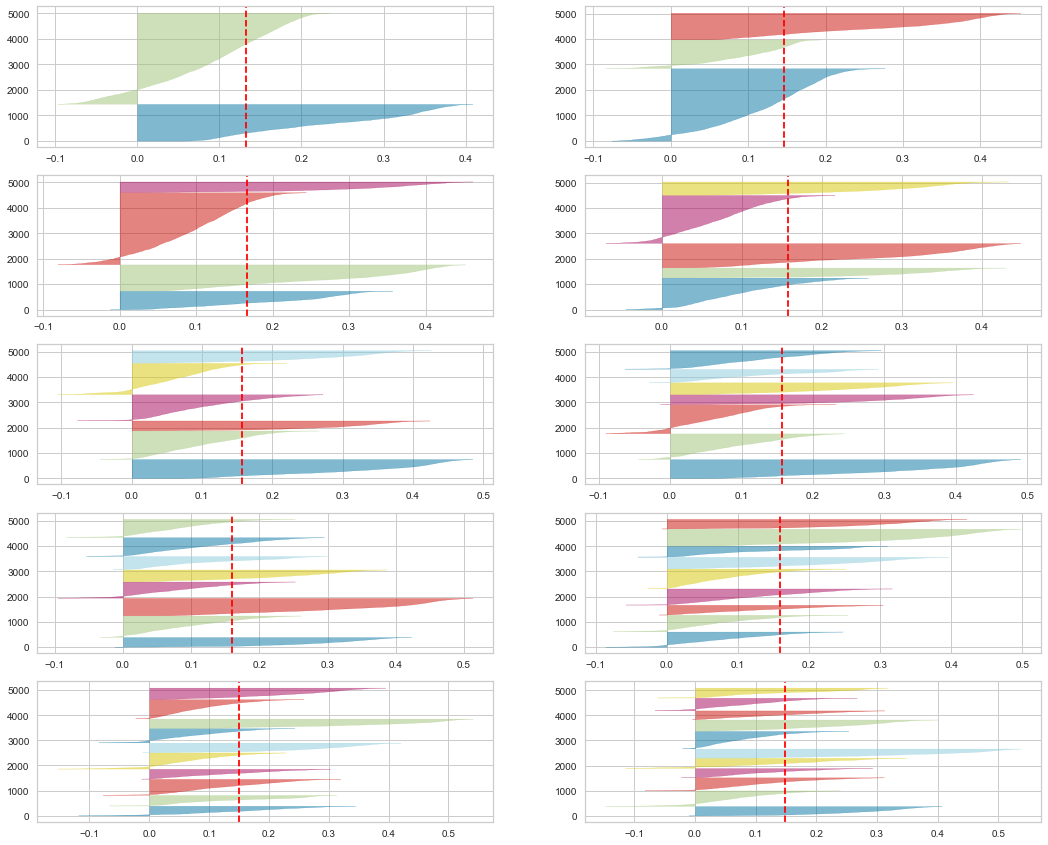

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(18,15))
for n_clusters in range_n_clusters:
    kmeans_pca = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y=kmeans_pca.fit_predict(X_pca)
    score = silhouette_score(X_pca, y, metric='euclidean')
    print('Silhouette Score is {} when number of clusters are {}'.format(score, n_clusters))
    vms=v_measure_score(ground_truth, y)
    print('V Measure Score is {} when number of clusters are {}'.format(vms, n_clusters))
    q, mod = divmod(n_clusters, 2)
    visualizer = SilhouetteVisualizer(kmeans_pca, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

In [9]:
kmeans_pca = KMeans(n_clusters = 11, init = 'k-means++', random_state = 42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

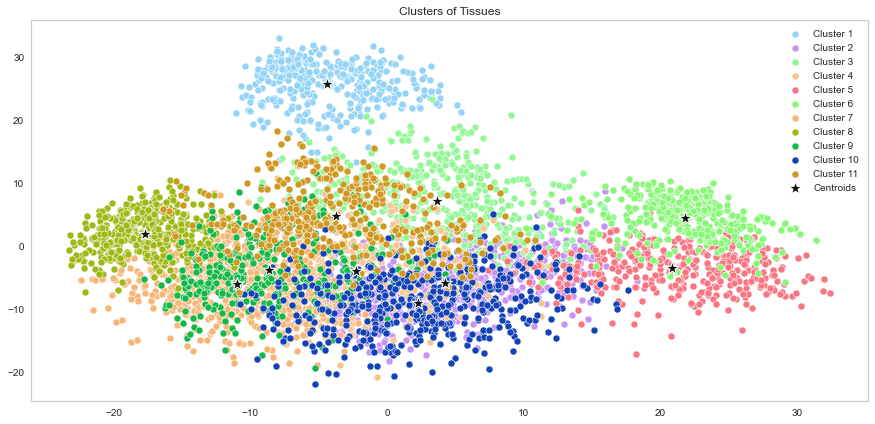

In [10]:
plt.figure(figsize=(15,7))
sns.scatterplot(X_pca[y_kmeans_pca == 0, 0], X_pca[y_kmeans_pca == 0, 1], color = '#93d3f7', label = 'Cluster 1',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], color = '#c793f7', label = 'Cluster 2',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], color = '#93f796', label = 'Cluster 3',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 3, 0], X_pca[y_kmeans_pca == 3, 1], color = '#f7c593', label = 'Cluster 4',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 4, 0], X_pca[y_kmeans_pca == 4, 1], color = '#f87581', label = 'Cluster 5',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 5, 0], X_pca[y_kmeans_pca == 5, 1], color = '#87f875', label = 'Cluster 6',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 6, 0], X_pca[y_kmeans_pca == 6, 1], color = '#f8b675', label = 'Cluster 7',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 7, 0], X_pca[y_kmeans_pca == 7, 1], color = '#9fb813', label = 'Cluster 8',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 8, 0], X_pca[y_kmeans_pca == 8, 1], color = '#13b846', label = 'Cluster 9',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 9, 0], X_pca[y_kmeans_pca == 9, 1], color = '#1342b8', label = 'Cluster 10',s=50)
sns.scatterplot(X_pca[y_kmeans_pca == 10, 0], X_pca[y_kmeans_pca == 10, 1], color = '#d09821', label = 'Cluster 11',s=50)
sns.scatterplot(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], color = 'k', 
                label = 'Centroids',s=200,marker='*')
plt.grid(False)
plt.title('Clusters of Tissues')
plt.legend()
plt.show()

In [11]:
X_umap = dataset_umap[:]

Silhouette Score is 0.1291297823190689 when number of clusters are 2
V Measure Score is 0.08920762542376649 when number of clusters are 2
Silhouette Score is 0.11685462296009064 when number of clusters are 3
V Measure Score is 0.16188667070302504 when number of clusters are 3
Silhouette Score is 0.14838027954101562 when number of clusters are 4
V Measure Score is 0.20367396624474882 when number of clusters are 4
Silhouette Score is 0.12649323046207428 when number of clusters are 5
V Measure Score is 0.28851468490418286 when number of clusters are 5
Silhouette Score is 0.12682472169399261 when number of clusters are 6
V Measure Score is 0.30467401772186997 when number of clusters are 6
Silhouette Score is 0.12589605152606964 when number of clusters are 7
V Measure Score is 0.34422753468155953 when number of clusters are 7
Silhouette Score is 0.11472630500793457 when number of clusters are 8
V Measure Score is 0.3466398524355463 when number of clusters are 8
Silhouette Score is 0.0971623

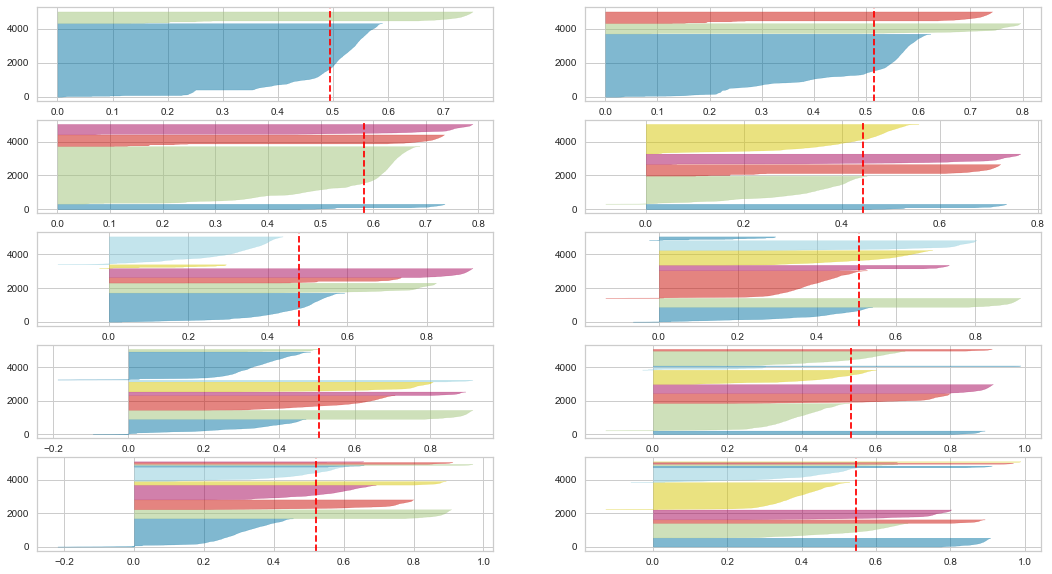

In [12]:
fig, ax = plt.subplots(5, 2, figsize=(18,10))
for n_clusters in range_n_clusters:
    kmeans_umap = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
    y=kmeans_umap.fit_predict(X_umap)
    score = silhouette_score(X_pca, y, metric='euclidean')
    print('Silhouette Score is {} when number of clusters are {}'.format(score, n_clusters))
    vms=v_measure_score(ground_truth, y)
    print('V Measure Score is {} when number of clusters are {}'.format(vms, n_clusters))
    q, mod = divmod(n_clusters, 2)
    visualizer = SilhouetteVisualizer(kmeans_umap, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_umap)

In [13]:
kmeans_umap = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans_umap = kmeans_umap.fit_predict(X_umap)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

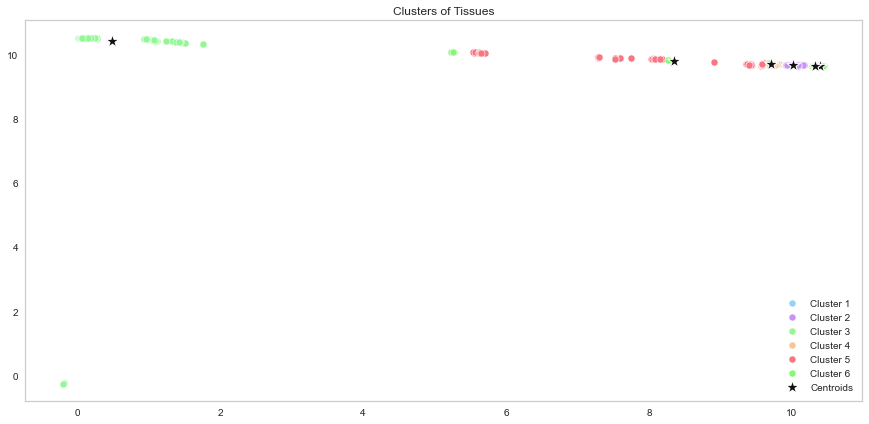

In [14]:
plt.figure(figsize=(15,7))
sns.scatterplot(X_umap[y_kmeans_umap == 0, 0], X_umap[y_kmeans_umap == 0, 1], color = '#93d3f7', label = 'Cluster 1',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 1, 0], X_umap[y_kmeans_umap == 1, 1], color = '#c793f7', label = 'Cluster 2',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 2, 0], X_umap[y_kmeans_umap == 2, 1], color = '#93f796', label = 'Cluster 3',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 3, 0], X_umap[y_kmeans_umap == 3, 1], color = '#f7c593', label = 'Cluster 4',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 4, 0], X_umap[y_kmeans_umap == 4, 1], color = '#f87581', label = 'Cluster 5',s=50)
sns.scatterplot(X_umap[y_kmeans_umap == 5, 0], X_umap[y_kmeans_umap == 5, 1], color = '#87f875', label = 'Cluster 6',s=50)
sns.scatterplot(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1], color = 'k', 
                label = 'Centroids',s=200,marker='*')
plt.grid(False)
plt.title('Clusters of Tissues')
plt.legend()
plt.show()